### *Training an object detection model on a dataset curated from Norwegian Eliteserien football league matches between 2021 and 2023 and evaluating its performance, and Comparing its performance with other models trained on the dataset*


#### 1. Required Libraries + Setting up Environment

In [ ]:
# Installing Ultralytics YOLOv8
!pip install ultralytics -quiet # object detection model
!pip install opencv-python-headless -quiet # for image processing
!pip install torch torchvision torchaudio -quiet # for deeplearning

import tensorflow as t # for deep learning tasks
from tensorflow.keras import datasets, layers, models # for deep learning tasks
import matplotlib.pyplot as plt  # for data viz
import numpy as np # dealing with vectors


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no

#### 2. Loading and preparing the data

In [ ]:
import os

# Create a directory for the dataset
dataset_dir = "/content/soccersum"
os.makedirs(dataset_dir, exist_ok=True)

# Download the dataset
!wget -O {dataset_dir}/soccersum.zip https://zenodo.org/records/10612084/files/Eliteserien.zip?download=1

# Unzip the dataset
!unzip -q {dataset_dir}/soccersum.zip -d {dataset_dir}


--2025-05-06 17:56:05--  https://zenodo.org/records/10612084/files/Eliteserien.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192688246 (184M) [application/octet-stream]
Saving to: ‘/content/soccersum/soccersum.zip’

/content/soccersum/ 100%[===================>] 183.76M  7.07MB/s    in 17s     

2025-05-06 17:56:22 (11.1 MB/s) - ‘/content/soccersum/soccersum.zip’ saved [192688246/192688246]



#### 3. EDA of frames for the Eliteserian League for 2023 and 2024
For image datasets, some useful EDA techniques include:

**Basic Overview**

* Number of images per year (2022 vs 2023)
* Image resolutions (Are they consistent?)
* File formats (JPEG, PNG, etc.)
* File size distribution

**Visualization**

* Display random images to inspect quality.
* Generate image histograms (e.g., brightness, pixel distribution).
* Check for corrupted images.

**Metadata Insights**

* Extract timestamps if filenames contain time info.
* Analyze frames per match (if structured that way).


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u

📊 **2021 Frames Summary**
🔹 Total Images: 250
🔹 Common Resolutions: {(1280, 720)}
🔹 Avg File Size: 250.45 KB

📊 **2022 Frames Summary**
🔹 Total Images: 250
🔹 Common Resolutions: {(1280, 720)}
🔹 Avg File Size: 236.40 KB

📊 **2023 Frames Summary**
🔹 Total Images: 250
🔹 Common Resolutions: {(1280, 720)}
🔹 Avg File Size: 267.33 KB


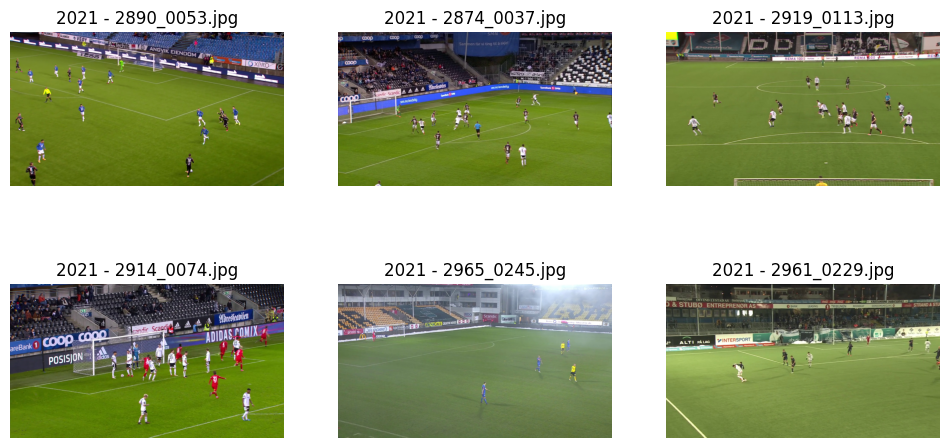

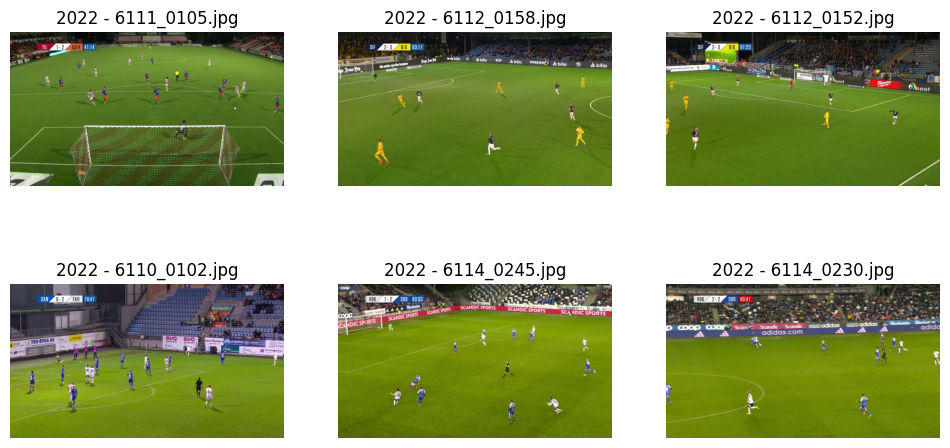

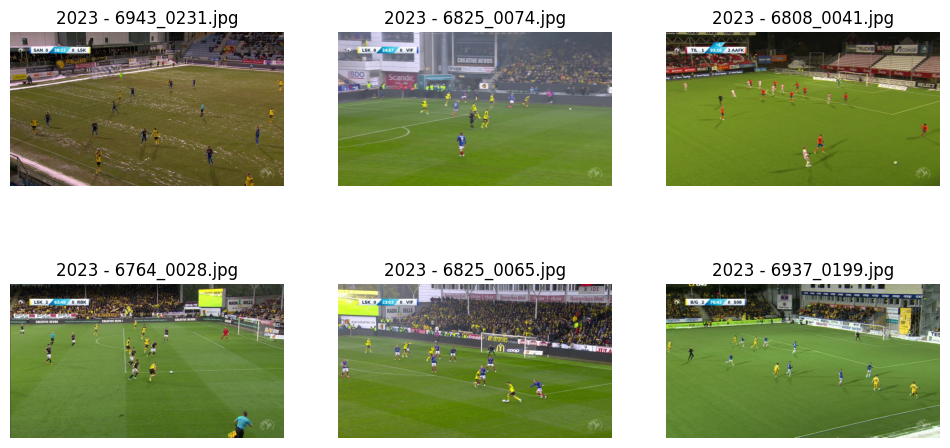

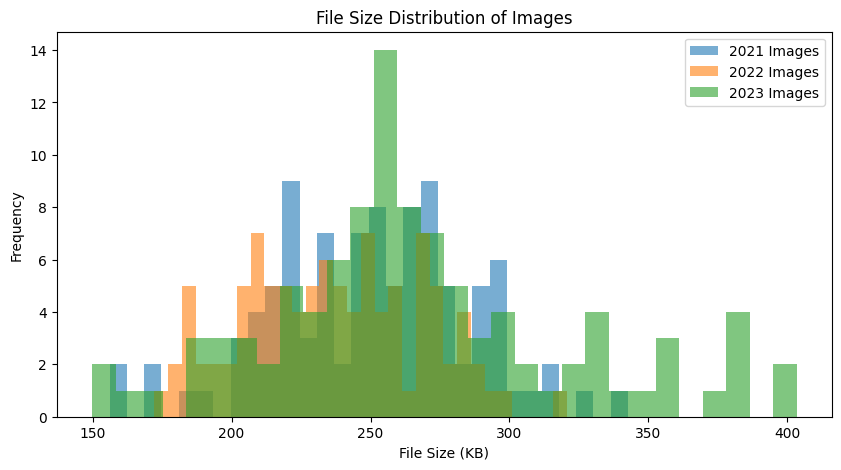

In [ ]:
!pip install opencv-python -quiet
import os # to put files into the OS
import cv2  # Install with: pip install opencv-python
from PIL import Image # for image processing
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization

# Define dataset path
base_path = "/content/soccersum/Eliteserien"
years = ["2021", "2022", "2023"]

# Dictionary to store image stats
image_data = {}

# Loop through years and analyze frames
for year in years:
    frames_path = os.path.join(base_path, year, "frames")

    if not os.path.exists(frames_path):
        print(f"Frames folder missing for {year}!")
        continue

    # Recursively collect all image paths
    image_files = []
    for root, _, files in os.walk(frames_path):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    num_images = len(image_files)

    # Store basic stats
    image_data[year] = {
        "num_images": num_images,
        "image_sizes": [],
        "file_sizes": [],
    }

    # Read first 100 images for size analysis
    for img_path in image_files[:100]:
        try:
            with Image.open(img_path) as img:
                image_data[year]["image_sizes"].append(img.size)  # (width, height)

            # Check file size (KB)
            file_size = os.path.getsize(img_path) / 1024
            image_data[year]["file_sizes"].append(file_size)

        except Exception as e:
            print(f"Error reading {img_path}: {e}")

# Print summary stats
for year, stats in image_data.items():
    print(f"\n📊 **{year} Frames Summary**")
    print(f"🔹 Total Images: {stats['num_images']}")
    print(f"🔹 Common Resolutions: {set(stats['image_sizes'])}")
    print(f"🔹 Avg File Size: {np.mean(stats['file_sizes']):.2f} KB")

# Visualizing Sample Images
def show_random_images(year, num_samples=6):
    frames_path = os.path.join(base_path, year, "frames")

    # Recursively collect images
    image_files = []
    for root, _, files in os.walk(frames_path):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found for {year}.")
        return

    sample_files = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)

    plt.figure(figsize=(12, 6))
    for i, file in enumerate(sample_files):
        img = Image.open(file)

        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{year} - {os.path.basename(file)}")

    plt.show()

# Show random images for both years
for year in years:
    show_random_images(year)

# File Size Distribution
plt.figure(figsize=(10, 5))
for year, stats in image_data.items():
    plt.hist(stats["file_sizes"], bins=30, alpha=0.6, label=f"{year} Images")

plt.xlabel("File Size (KB)")
plt.ylabel("Frequency")
plt.title("File Size Distribution of Images")
plt.legend()
plt.show()

#### 4. YOLOv8 Model
Before we start training the model, i need to organize the Eliteserien dataset and create a data.yaml file for YOLOv8 training within your Google Colab environment.

**Step 1: Organize the Dataset**


In [ ]:
import shutil # For file organization
from sklearn.model_selection import train_test_split # For splitting your data
import os

# Define base directory
base_dir = "/content/soccersum/Eliteserien"

# Output directories for YOLO training
output_dir = "/content/yolo_dataset"
os.makedirs(os.path.join(output_dir, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "labels", "val"), exist_ok=True)

# Collect images and corresponding labels
image_files = []
label_files = []

years = ["2021", "2022", "2023"]
for year in years:
    frames_path = os.path.join(base_dir, year, "frames")
    detection_path = os.path.join(base_dir, year, "detection")

    if not os.path.exists(frames_path) or not os.path.exists(detection_path):
        print(f"Skipping {year} - frames or detection folder missing")
        continue

    for game_id in os.listdir(frames_path):
        game_frames = os.path.join(frames_path, game_id)
        game_labels = os.path.join(detection_path, game_id)

        if not os.path.exists(game_labels):
            print(f"Skipping {game_id} - no matching detection folder")
            continue

        for file in os.listdir(game_frames):
            if file.endswith((".jpg", ".png", ".jpeg")):
                image_path = os.path.join(game_frames, file)
                label_path = os.path.join(game_labels, file.replace(".jpg", ".txt").replace(".png", ".txt").replace(".jpeg", ".txt"))

                if os.path.exists(label_path):  # Only add if label exists
                    image_files.append(image_path)
                    label_files.append(label_path)

# Split into train (80%) and val (20%)
train_images, val_images, train_labels, val_labels = train_test_split(image_files, label_files, test_size=0.2, random_state=42)

# Move files into YOLO dataset structure
for img, lbl in zip(train_images, train_labels):
    shutil.copy(img, os.path.join(output_dir, "images", "train"))
    shutil.copy(lbl, os.path.join(output_dir, "labels", "train"))

for img, lbl in zip(val_images, val_labels):
    shutil.copy(img, os.path.join(output_dir, "images", "val"))
    shutil.copy(lbl, os.path.join(output_dir, "labels", "val"))

print("✅ Dataset organized successfully!")


✅ Dataset organized successfully!


**Step 2: Creating the YAML data file**

In [ ]:
train = '/content/yolo_dataset/images/train/'
val = '/content/yolo_dataset/images/val/'

nc = 8
names = ['Player', 'Goalkeeper', 'Referee', 'Ball', 'Logo', 'Penalty Mark', 'Corner Flagpost', 'Goal Net']

# Saving to correct location
data_yaml_content = f"""train: {train}
val: {val}

nc: {nc}
names: {names}
"""

with open("/content/yolo_dataset/data.yaml", "w") as f:
    f.write(data_yaml_content)

**Step 3: Training the model**

In [ ]:
import sys
!pip install ultralytics -q
from ultralytics import YOLO

# Load YOLOv8 model
yolo_model = YOLO("yolov8x.pt")  # More powerful than "yolov8m.pt"

# Train YOLO on the dataset
yolo_model.train(
    data="/content/yolo_dataset/data.yaml",  # Path to data.yaml
    epochs=20,
    batch=16,
    imgsz=640
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultraly

100%|██████████| 131M/131M [00:00<00:00, 391MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 755k/755k [00:00<00:00, 19.7MB/s]

Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 123MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 284.8±297.6 MB/s, size: 263.7 KB)


train: Scanning /content/yolo_dataset/labels/train... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:01<00:00, 417.17it/s]

train: New cache created: /content/yolo_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 56.5±17.3 MB/s, size: 245.8 KB)


val: Scanning /content/yolo_dataset/labels/val... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 354.13it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      11.6G      1.488      1.779      1.022        347        640: 100%|██████████| 38/38 [00:48<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        150       2913       0.81      0.601      0.646      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.4G      1.428      0.782     0.9995        329        640: 100%|██████████| 38/38 [00:50<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        150       2913       0.67      0.537      0.605      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.3G      1.413     0.7476     0.9866        274        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        150       2913      0.821      0.606      0.672      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.4G      1.406      0.697     0.9815        251        640: 100%|██████████| 38/38 [00:50<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        150       2913       0.68      0.668      0.699        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.4G      1.397     0.6711     0.9838        274        640: 100%|██████████| 38/38 [00:50<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        150       2913      0.753       0.66       0.72      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.5G      1.373     0.6546     0.9749        243        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        150       2913      0.889      0.683      0.728      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.3G      1.353     0.6404     0.9723        212        640: 100%|██████████| 38/38 [00:50<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        150       2913      0.766      0.701      0.734       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.3G       1.35     0.6248     0.9642        249        640: 100%|██████████| 38/38 [00:50<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        150       2913       0.81      0.715      0.744      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.4G      1.317     0.6043     0.9628        226        640: 100%|██████████| 38/38 [00:49<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150       2913      0.847      0.749      0.777      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.3G      1.314     0.5864     0.9589        177        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150       2913      0.834       0.73      0.757      0.452


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.5G      1.333     0.5894     0.9767        169        640: 100%|██████████| 38/38 [00:49<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        150       2913      0.791      0.736      0.749      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.5G      1.323     0.5801     0.9682        149        640: 100%|██████████| 38/38 [00:48<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        150       2913      0.847      0.733      0.766      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.5G      1.324     0.5801     0.9802        120        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150       2913      0.797      0.754      0.769      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.5G      1.302     0.5621     0.9759        145        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        150       2913      0.911      0.715      0.777      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.5G        1.3     0.5549     0.9665        148        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        150       2913      0.844      0.741       0.78      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.5G      1.287     0.5396     0.9634        133        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150       2913      0.816      0.766      0.773      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.5G      1.264     0.5239     0.9599        155        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        150       2913      0.849      0.763      0.782      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.5G      1.251     0.5137     0.9515        123        640: 100%|██████████| 38/38 [00:49<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150       2913      0.874      0.765      0.795      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.5G      1.231     0.5039     0.9431        134        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150       2913      0.851      0.783      0.801      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.5G      1.224     0.4943      0.948        153        640: 100%|██████████| 38/38 [00:49<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        150       2913      0.841      0.795      0.802      0.486



20 epochs completed in 0.337 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,131,272 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]


                   all        150       2913      0.841      0.795      0.802      0.486
                Player        150       2023      0.908      0.982      0.986      0.602
            Goalkeeper        114        117      0.863      0.912      0.927      0.474
               Referee        112        113       0.89      0.947      0.936       0.59
                  Ball        135        142      0.843      0.415      0.462      0.158
                  Logo         96        189      0.943      0.968      0.978      0.789
          Penalty Mark        100        100      0.551       0.29      0.266     0.0697
       Corner Flagpost        118        121      0.804      0.893      0.879      0.384
              Goal Net        105        108      0.924      0.954      0.983      0.819
Speed: 0.5ms preprocess, 15.6ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b35bfb1af10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

**Step 4: Evaluating the Model (using precision, recall, and mAP):**
 * Now that the training is complete, we can assess its performance by examining the validation metrics. The training script will generate TensorBoard logs in the `runs` directory.

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir runs

**Step 5: Running inference on sample images**

In [ ]:
import cv2
import os
sample_images = [
    os.path.join("/content/yolo_dataset/images/val", file)
    for file in os.listdir("/content/yolo_dataset/images/val")
    if file.endswith((".jpg", ".png", ".jpeg"))
][:5]  # Get the first 5 image paths

# Run inference on the sample images
for image_path in sample_images:
    # Run prediction
    results = yolo_model.predict(source=image_path, save=True, conf=0.5)  # conf is the confidence threshold

    # Load the image with predictions
    predicted_image_path = results[0].save_dir  # Path where the predicted image is saved
    predicted_image = cv2.imread(predicted_image_path + "/" + os.path.basename(image_path))

    # Convert BGR to RGB for displaying with matplotlib
    predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

    # Step 4: Visualize the results
    plt.figure(figsize=(10, 10))
    plt.imshow(predicted_image)
    plt.axis("off")
    plt.title(f"Predictions for {os.path.basename(image_path)}")
    plt.show()

#### Step 6: Running inference on video

### 6.1 Sourcing and Preparing the Video
The YouTube video is a full match between Mjøndalen and Bodø/Glimt, uploaded by Magix-Live. :

#### Downloading the Video
* Duration Concern: A full match video is typically 1.5–2 hours long, which is too large for practical processing in Google Colab (limited disk space and runtime). Instead, download a short clip (e.g., 1–5 minutes) to test inference pipeline.
* Tool: We will yt-dlp, a robust command-line tool for downloading YouTube videos or specific segments.

#### 6.1.1 Installing yt-dlp

In [ ]:
!pip install yt-dlp --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 72.2 MB/s eta 0:00:00


#### 6.1.2 Download a short segment (e.g., the first 2 minutes) using the --download-sections option

In [ ]:
!yt-dlp -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4' --download-sections "*0:00-2:00" --output "/content/soccersum/videos/mjondalen_bodo_glimt.mp4" "https://www.youtube.com/watch?v=7_lq764vNBs"

[youtube] Extracting URL: https://www.youtube.com/watch?v=7_lq764vNBs
[youtube] 7_lq764vNBs: Downloading webpage
[youtube] 7_lq764vNBs: Downloading tv client config
[youtube] 7_lq764vNBs: Downloading tv player API JSON
[youtube] 7_lq764vNBs: Downloading ios player API JSON
[youtube] 7_lq764vNBs: Downloading m3u8 information
[info] 7_lq764vNBs: Downloading 1 format(s): 136+140
[info] 7_lq764vNBs: Downloading 1 time ranges: 0.0-120.0
[download] Destination: /content/soccersum/videos/mjondalen_bodo_glimt.mp4
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'https://rr5---sn-q4flrnld.googlevideo.com/videoplayback?expire=1746577283&ei=I1MaaNnTIYLWsfIPoIrbgQ0&ip=34.16.240.233&id=o-AL5l6k7vnjhgrGsy-h8Ni5VXP1vYLR7G_RlBaSYEi5LU&itag=136&aitags=134%2C136%2C160%2C243&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1746555683%2C&mh=Hj&mm=31%2C29&mn=sn-q4flrnld%2Csn-q4fl6nd7&ms=au%2Crdu&mv=m&mvi=5&pl=17&rms=au%2Cau&initcwndbps=3953750&bui=AecWEAY48oU0q8NrpGEgXhZ70qqiWCnbH_NlKVFRai6TZNjtF3GXuxtzpNS5KU

#### 6.1.3 Verifying file size

In [ ]:
import cv2
cap = cv2.VideoCapture("/content/soccersum/videos/mjondalen_bodo_glimt.mp4")
print("Duration (seconds):", cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS))
cap.release()

Duration (seconds): 120.03333333333333


#### 6.1.4 Real-Time Object Detection on Video

[youtube] Extracting URL: https://www.youtube.com/watch?v=7_lq764vNBs
[youtube] 7_lq764vNBs: Downloading webpage
[youtube] 7_lq764vNBs: Downloading tv client config
[youtube] 7_lq764vNBs: Downloading tv player API JSON
[youtube] 7_lq764vNBs: Downloading ios player API JSON
[youtube] 7_lq764vNBs: Downloading m3u8 information
[info] 7_lq764vNBs: Downloading 1 format(s): 136+140
[info] 7_lq764vNBs: Downloading 1 time ranges: 0.0-120.0
[download] /content/soccersum/videos/mjondalen_bodo_glimt.mp4 has already been downloaded
Using device: cuda

Processing video: /content/soccersum/videos/mjondalen_bodo_glimt.mp4
Original Resolution: 1280x720, FPS: 30, Total Frames: 3601

Processed 50/3601 frames (1.4%)
Processed 100/3601 frames (2.8%)
Processed 150/3601 frames (4.2%)
Processed 200/3601 frames (5.6%)
Processed 250/3601 frames (6.9%)
Processed 300/3601 frames (8.3%)
Processed 350/3601 frames (9.7%)
Processed 400/3601 frames (11.1%)
Processed 450/3601 frames (12.5%)
Processed 500/3601 frames (

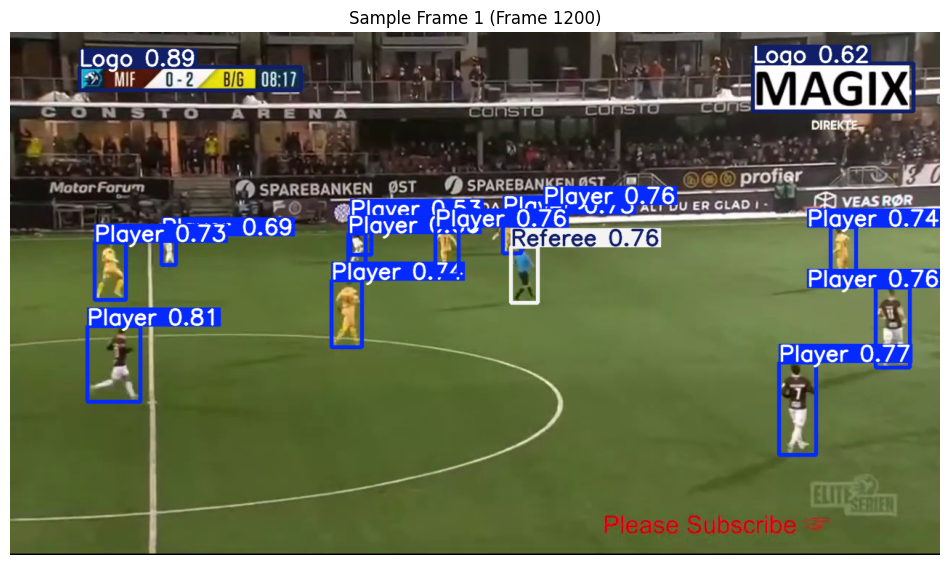

Processed 1250/3601 frames (34.7%)
Processed 1300/3601 frames (36.1%)
Processed 1350/3601 frames (37.5%)
Processed 1400/3601 frames (38.9%)
Processed 1450/3601 frames (40.3%)
Processed 1500/3601 frames (41.7%)
Processed 1550/3601 frames (43.0%)
Processed 1600/3601 frames (44.4%)
Processed 1650/3601 frames (45.8%)
Processed 1700/3601 frames (47.2%)
Processed 1750/3601 frames (48.6%)
Processed 1800/3601 frames (50.0%)
Processed 1850/3601 frames (51.4%)
Processed 1900/3601 frames (52.8%)
Processed 1950/3601 frames (54.2%)
Processed 2000/3601 frames (55.5%)
Processed 2050/3601 frames (56.9%)
Processed 2100/3601 frames (58.3%)
Processed 2150/3601 frames (59.7%)
Processed 2200/3601 frames (61.1%)
Processed 2250/3601 frames (62.5%)
Processed 2300/3601 frames (63.9%)
Processed 2350/3601 frames (65.3%)
Processed 2400/3601 frames (66.6%)


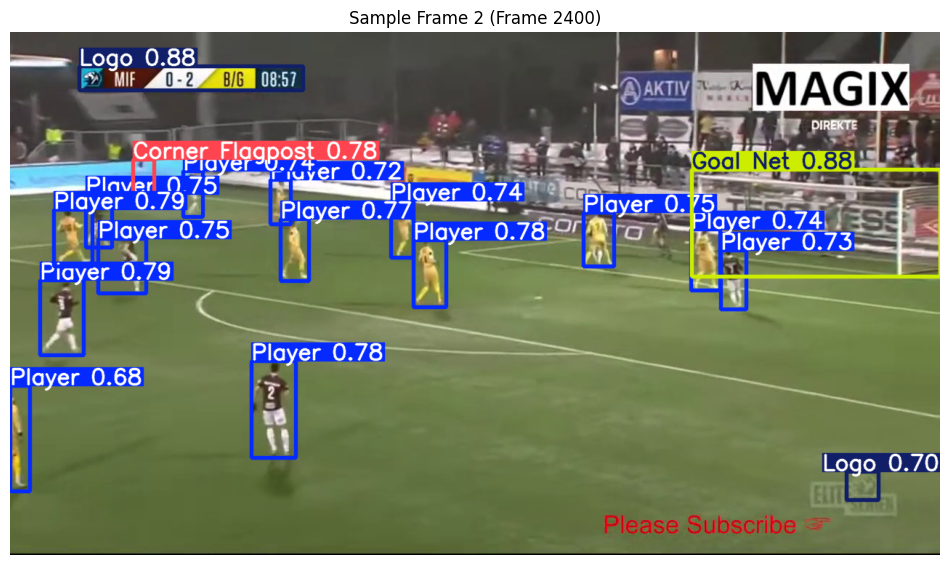

Processed 2450/3601 frames (68.0%)
Processed 2500/3601 frames (69.4%)
Processed 2550/3601 frames (70.8%)
Processed 2600/3601 frames (72.2%)
Processed 2650/3601 frames (73.6%)
Processed 2700/3601 frames (75.0%)
Processed 2750/3601 frames (76.4%)
Processed 2800/3601 frames (77.8%)
Processed 2850/3601 frames (79.1%)
Processed 2900/3601 frames (80.5%)
Processed 2950/3601 frames (81.9%)
Processed 3000/3601 frames (83.3%)
Processed 3050/3601 frames (84.7%)
Processed 3100/3601 frames (86.1%)
Processed 3150/3601 frames (87.5%)
Processed 3200/3601 frames (88.9%)
Processed 3250/3601 frames (90.3%)
Processed 3300/3601 frames (91.6%)
Processed 3350/3601 frames (93.0%)
Processed 3400/3601 frames (94.4%)
Processed 3450/3601 frames (95.8%)
Processed 3500/3601 frames (97.2%)
Processed 3550/3601 frames (98.6%)
Processed 3600/3601 frames (100.0%)


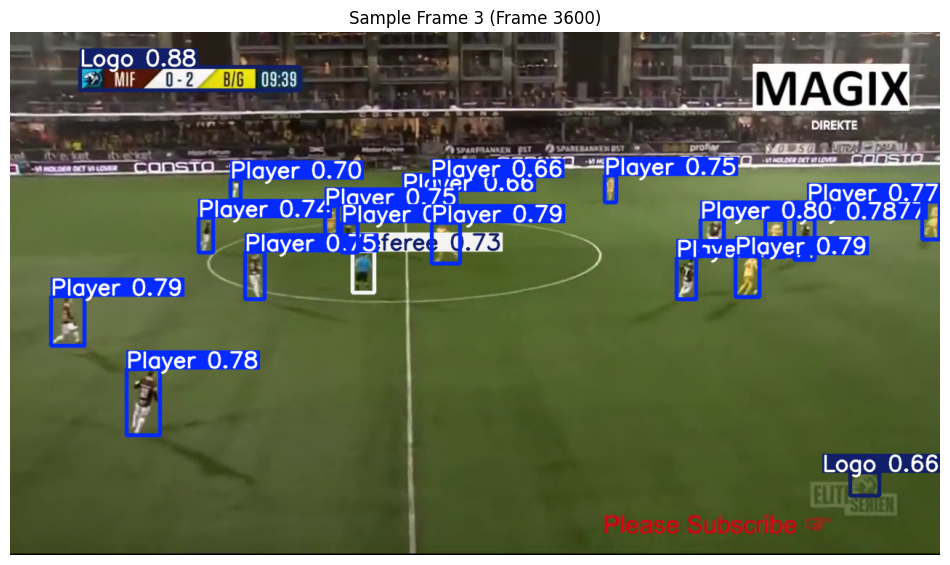

Processed 3601/3601 frames (100.0%)

Video processing complete
Output saved to: /content/soccersum/videos/output_mjondalen_bodo_glimt.mp4
Buffered data was truncated after reaching the output size limit.

In [ ]:
# Download a sample video clip (2 minutes) from YouTube
!yt-dlp -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4' \
         --download-sections "*0:00-2:00" \
         --output "/content/soccersum/videos/mjondalen_bodo_glimt.mp4" \
         "https://www.youtube.com/watch?v=7_lq764vNBs"

# Import required libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video, display
from ultralytics import YOLO
import torch

# Initialize model (replace with your trained model path)


# Set device (GPU if available)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
yolo_model.to(device)
print(f"Using device: {device}")

# Define paths
video_path = "/content/soccersum/videos/mjondalen_bodo_glimt.mp4"
output_path = "/content/soccersum/videos/output_mjondalen_bodo_glimt.mp4"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Verify video file exists
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file {video_path} not found")

# Open the video file
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError("Could not open video file")

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Resize frames to match dataset resolution (1280x720)
TARGET_RESOLUTION = (1280, 720)
resize_needed = (frame_width, frame_height) != TARGET_RESOLUTION
if resize_needed:
    print(f"Resizing frames from {frame_width}x{frame_height} to {TARGET_RESOLUTION[0]}x{TARGET_RESOLUTION[1]}")
    frame_width, frame_height = TARGET_RESOLUTION

# Video writer setup
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
if not out.isOpened():
    cap.release()
    raise IOError("Could not open output video file")

print(f"\nProcessing video: {video_path}")
print(f"Original Resolution: {frame_width}x{frame_height}, FPS: {fps}, Total Frames: {total_frames}\n")

# Process video frame by frame
frame_count = 0
sample_frame_count = 0
max_sample_frames = 3  # Number of sample frames to display
frame_skip = 1  # Process every nth frame (1 = no skipping)

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1

        # Skip frames if needed for faster processing
        if frame_count % frame_skip != 0:
            continue

        # Progress update
        if frame_count % 50 == 0 or frame_count == total_frames:
            print(f"Processed {frame_count}/{total_frames} frames ({frame_count/total_frames:.1%})")

        # Resize frame if needed
        if resize_needed:
            frame = cv2.resize(frame, TARGET_RESOLUTION)

        # Run inference (adjust classes parameter if you only want specific objects)
        results = yolo_model.predict(
            source=frame,
            save=False,
            conf=0.5,
            device=device,
            classes=None,  # Optionally filter classes: e.g., [0,1] for specific classes
            verbose=False
        )

        # Annotate the frame
        annotated_frame = results[0].plot()

        # Write to output video
        out.write(annotated_frame)

        # Display sample frames
        if sample_frame_count < max_sample_frames and frame_count % (total_frames//max_sample_frames) == 0:
            annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(12, 8))
            plt.imshow(annotated_frame_rgb)
            plt.axis("off")
            plt.title(f"Sample Frame {sample_frame_count + 1} (Frame {frame_count})")
            plt.show()
            sample_frame_count += 1

except Exception as e:
    print(f"\nError processing frame {frame_count}: {str(e)}")

finally:
    # Release resources
    cap.release()
    out.release()
    print("\nVideo processing complete")
    print(f"Output saved to: {output_path}")

    # Display the processed video
    display(Video(output_path, embed=True, width=800))